In [1]:
!pip install scikit-learn numpy pandas matplotlib seaborn nltk regex wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import wordcloud
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [3]:
data_path = "emails.csv.zip"
message_dataseti = pd.read_csv(data_path, engine='python')
message_dataseti.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
message_dataseti.shape

(5728, 2)

<Axes: ylabel='count'>

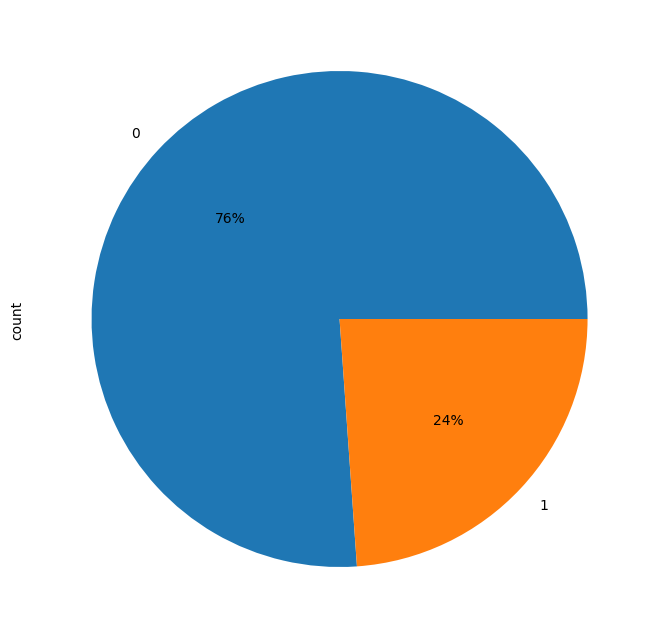

In [5]:
plt.rcParams["figure.figsize"] = [8,10]
message_dataseti.spam.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')

message_dataseti['text_without_sw']= message_dataseti['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


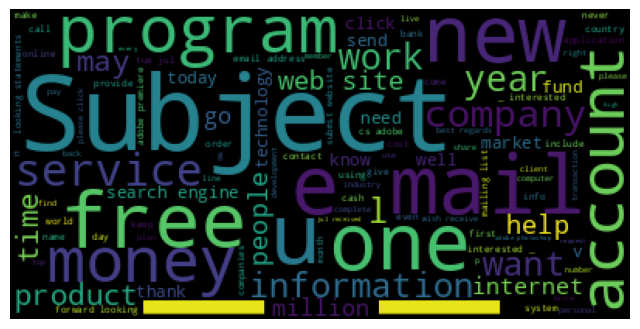

In [7]:
message_dataseti_spam= message_dataseti[message_dataseti["spam"] == 1]

plt.rcParams["figure.figsize"] = [8,10]
text= ' '.join(message_dataseti_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

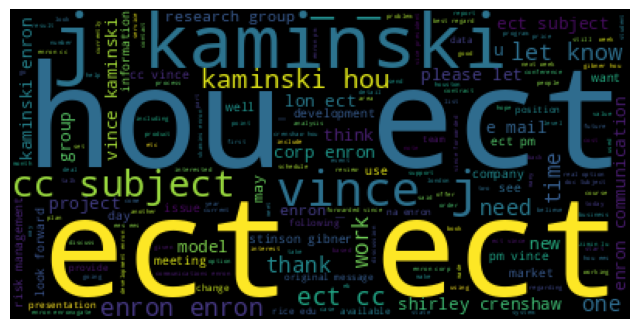

In [8]:
message_dataseti_ham = message_dataseti[message_dataseti["spam"] == 0]

plt.rcParams["figure.figsize"]= [8,10]
text = ' '.join(message_dataseti_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [9]:
X = message_dataseti["text"]

Y = message_dataseti["spam"]

In [10]:
def clean_text(doc):

  document = re.sub('[^a-zA-Z ]', '', doc).lower()


  document = re.sub(r"\s+[a-z]\s+", " ", document)


  document = re.sub(r'\s+', ' ', document)

  return document

In [11]:
X_sentences = []
reviews = list(X)
for rev in reviews:
  X_sentences.append(clean_text(rev))

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(X_sentences).toarray()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [14]:
spam_detector = MultinomialNB()
spam_detector.fit(X_train, Y_train)

MultinomialNB()

In [15]:
Y_pred = spam_detector.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[849   7]
 [ 18 272]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

0.9781849912739965


In [18]:
print(X_sentences[56])
print(Y[56])

subject localized software all languages available hello we would like to offer localized software versions german french spanish uk and many others aii iisted software is available for immediate downioad no need to wait week for cd deiivery just few exampies norton lnternet security pro windows xp professionai with sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx just browse our site and find any software you need in your native ianguaqe best reqards kayieen 
1


In [21]:
print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))

[1]
